# Employee Dataset Overview

### Context
The dataset contains details of customers in a company.

### Content
The columns include information about estimated salary, age, sex, and other relevant attributes, aiming to provide comprehensive details about an employee.

### About This File
Based on the data of employees at a bank, we calculate whether an employee stands a chance to stay in the company or not.

### Importing Libraries

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset 


In [53]:
df=pd.read_csv('E:\Capstone Project\Churn Model Using Logistic Regression\Churn_Modelling.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2384\3775819804.py:1: SyntaxWarning: invalid escape sequence '\C'
  df=pd.read_csv('E:\Capstone Project\Churn Model Using Logistic Regression\Churn_Modelling.csv')


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Data Preprocessing

- Find is there any null

In [54]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- Drop unneccesary Columns

In [56]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [57]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Exploring Data

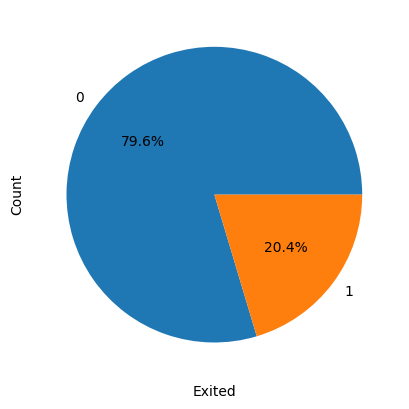

In [58]:
df['Exited'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

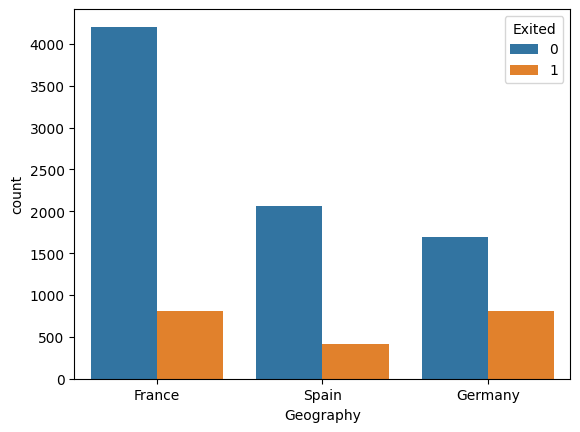

In [59]:
sns.countplot(x='Geography',hue='Exited',data=df)
plt.show()

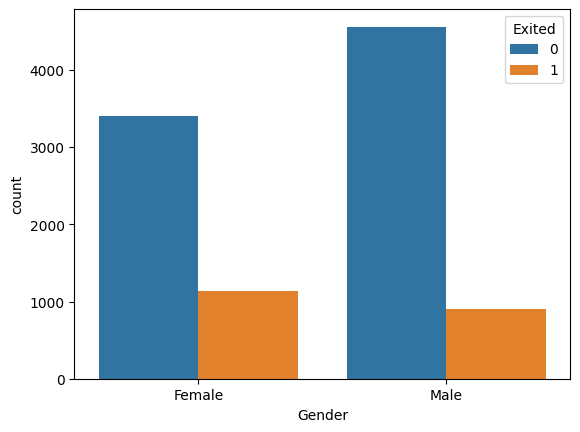

In [60]:
sns.countplot(x='Gender',hue='Exited',data=df)
plt.show()

# Encoding Catagorical Data

In [61]:
df.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [62]:
df.Gender = pd.Categorical(df.Gender).codes

In [63]:
df.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [64]:
df.Geography = pd.Categorical(df.Geography).codes

In [65]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
804,850,0,1,39,4,127771.35,2,0,1,151738.54,0
3823,627,0,1,31,8,128131.73,1,1,0,96131.47,0
3056,685,0,1,58,1,104796.54,1,1,1,154181.41,0
5646,526,1,0,35,9,118536.40,1,1,0,40980.87,1
9571,739,2,0,41,8,0.00,1,1,0,191694.77,1


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int8   
 2   Gender           10000 non-null  int8   
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), int8(2)
memory usage: 722.8 KB


# Spliting Data

In [67]:
X = df.drop('Exited',axis=1)
y = df['Exited']
y.shape

(10000,)

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=40)
print('shape of X_train',X_train.shape)
print('shape of y_train',y_train.shape)
print('shape of X_test',X_test.shape)
print('shape of y_test',y_test.shape)

shape of X_train (8000, 10)
shape of y_train (8000,)
shape of X_test (2000, 10)
shape of y_test (2000,)


### Feature Scaling and Normalization 

In [69]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

### Model Building 
- We will check different Models and chechk which give us more Accuracy

In [70]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)
print('Áccuracy of accuracy_score=',accuracy)

Áccuracy of accuracy_score= 0.8195


In [72]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('Áccuracy of RFC=',accuracy)

Áccuracy of RFC= 0.877


In [73]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred=gbc.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy of GBC=',accuracy)

Accuracy of GBC= 0.8815


<Axes: >

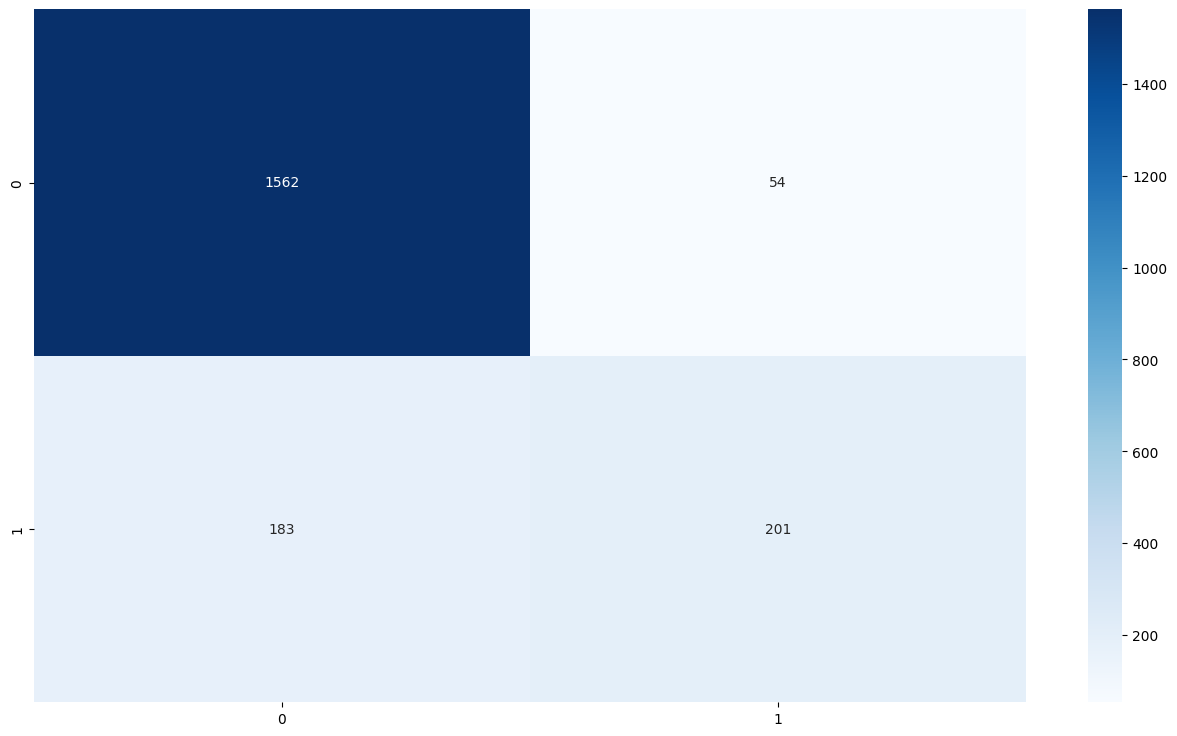

In [74]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
df=pd.DataFrame(confusion_matrix(y_test,y_pred))
sns.heatmap(df,annot=True, fmt='d',cmap=plt.cm.Blues)

### Gradient Boosting Classifier gives best Accuracy